# Chapter 6 - The ARIMA Model

In practice, if you are doing univariate time series, you will generally go directly to ARIMA if you have no expectation of seasonality, or if you expect seasonality, you will go directly to SARIMA (which will be covered in the next chapter).



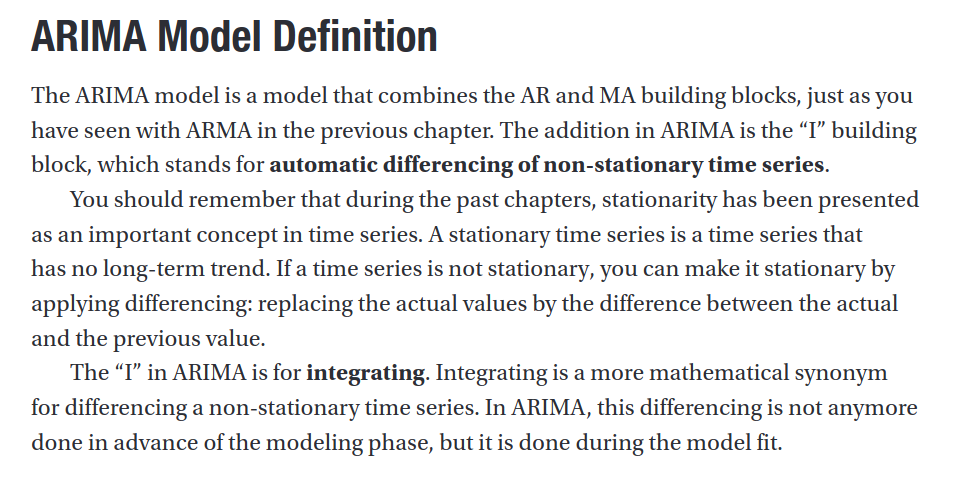

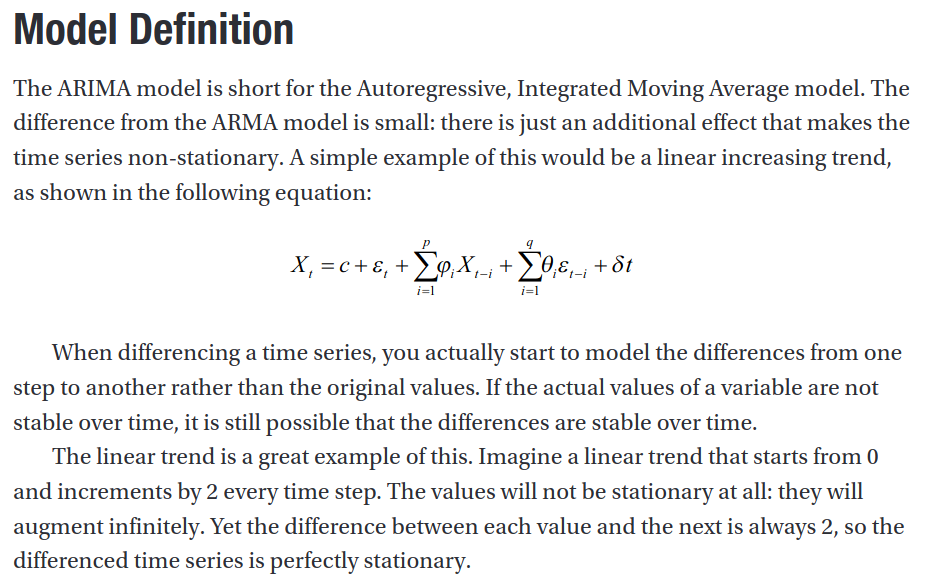


**ARIMA on the CO2 Example**

The fact that the differencing is part of the hyperparameters has a great added value for
model building. This makes it possible to do automated hyperparameter tuning on the
number of times that differencing should be applied.


## Listing 6-1. Importing the data

In [ ]:
import statsmodels.api as sm
data = sm.datasets.co2.load_pandas()
data = data.data
data.head()


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Listing 6-2. Plotting the data

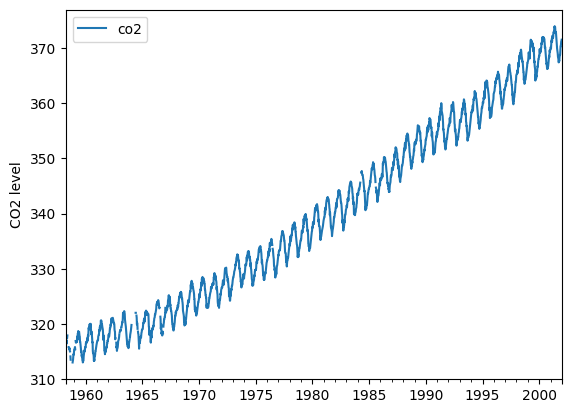

In [ ]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel('CO2 level')
plt.show()


This data shows a very obvious sign of an upward trend, which is fairly constant.

And there is also a very clear seasonality pattern in this data (up and down).

Now remember, the first thing that you should generally look at is autocorrelation and partial autocorrelation functions.

**Remember that the autocorrelation (ACF) and partial autocorrelation (PACF) plots are relevant only when applied to stationary data!!!**

You can use Listing 6-3 to create ACF and PACF plots directly on the differenced data.

## Listing 6-3. ACF and PACF plots

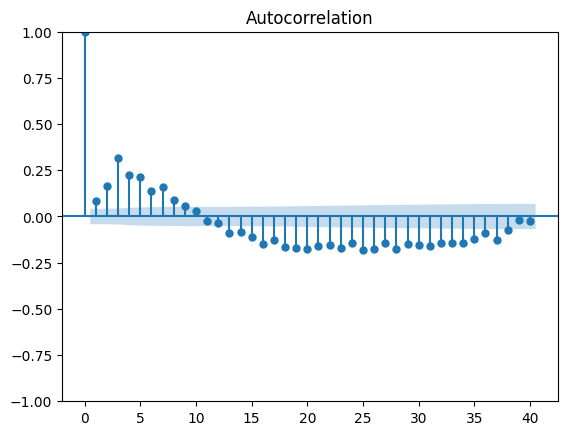

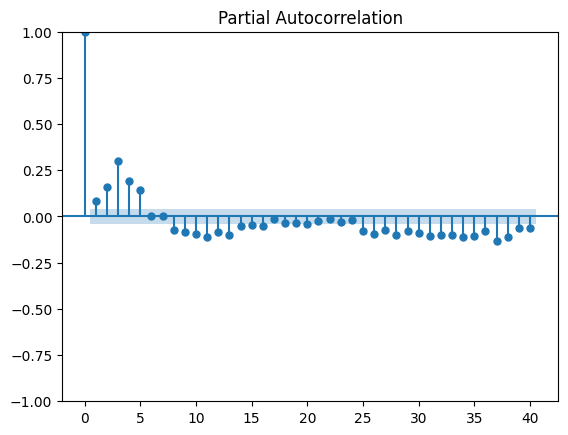

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.diff().dropna(), lags=40)
plot_pacf(data.diff().dropna(), lags=40)
plt.show()


It is interesting to note that there are many lagged values in the autocorrelation and partial autocorrelation.

So what does this mean?

In general, if there is no decay of the correlations toward zero, this means the data is not stationary.

Yet the data has been differenced and seems stationary.

The answer here is that the decay occurs relatively late in the autocorrelation.

The ACF and PACF plots have 40 lags, but that is not enough for the current example. So let's go for 600.

## Listing 6-4. ACF and PACF plots with more lags

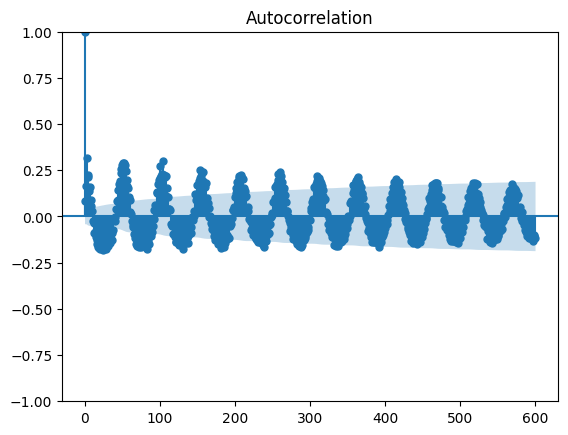

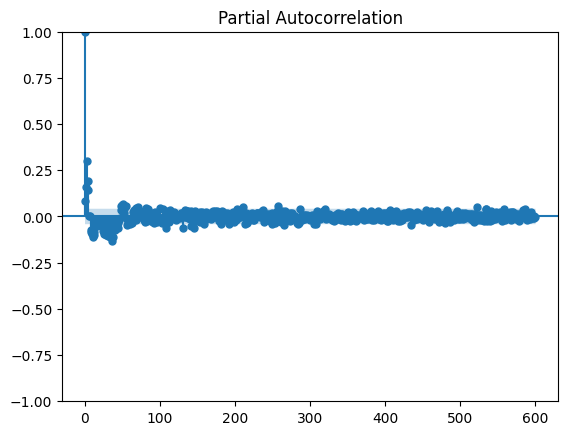

In [ ]:
plot_acf(data.diff().dropna(), lags=600)
plot_pacf(data.diff().dropna(), lags=600)
plt.show()


This makes it an interesting case for the question of the order of the model.

Let’s see how to augment the previous chapter’s grid search cross-validation by adding the (I) as a third hyperparameter to use in the optimization.

## Listing 6-5. Hyperparameter tuning

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = data[['co2']].values

avg_errors = []

for p in range(6):
    for q in range(6):
        for i in range(3):
            errors = []

            tscv = TimeSeriesSplit(test_size=10)

            for train_index, test_index in tscv.split(data_array):

                X_train, X_test = data_array[train_index], data_array[test_index]
                X_test_orig = X_test

                fcst = []
                for step in range(10):

                    try:
                        mod = ARIMA(X_train, order=(p,i,q))
                        res = mod.fit()

                        fcst.append(res.forecast(steps=1))

                    except:
                        print('errorred')
                        fcst.append(-9999999.)

                    X_train = np.concatenate((X_train, X_test[0:1,:]))
                    X_test = X_test[1:]

                errors.append(r2_score(X_test_orig, fcst))

            pq_result = [p, i, q, np.mean(errors)]

            print(pq_result)
            avg_errors.append(pq_result)

avg_errors = pd.DataFrame(avg_errors)
avg_errors.columns = ['p', 'i', 'q', 'error']
avg_errors.sort_values('error', ascending=False)


[0, 0, 0, -1710.6765801329225]
[0, 1, 0, 0.6416554176244676]
[0, 2, 0, 0.31328222430845853]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

[0, 0, 1, -438.562195364291]
[0, 1, 1, 0.6415354415459047]
[0, 2, 1, 0.6579648103962594]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

[0, 0, 2, -134.5086200701033]
[0, 1, 2, 0.6560671261866962]
[0, 2, 2, 0.6888741726564322]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

[0, 0, 3, -49.06468920257595]
[0, 1, 3, 0.6842284167891082]
[0, 2, 3, 0.6867179118085629]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


errorred
errorred
errorred
errorred


The result of this code will give you a dataframe ordered by R2 scores.

The best R2 score is 0.741, and it is obtained for the combination of p = 4, q = 4, and I = 1.

This means that there is an autoregressive effect of order 4 and a moving average effect of order 4. The data must be differenced one time.

## Listing 6-6. Plot the final result

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

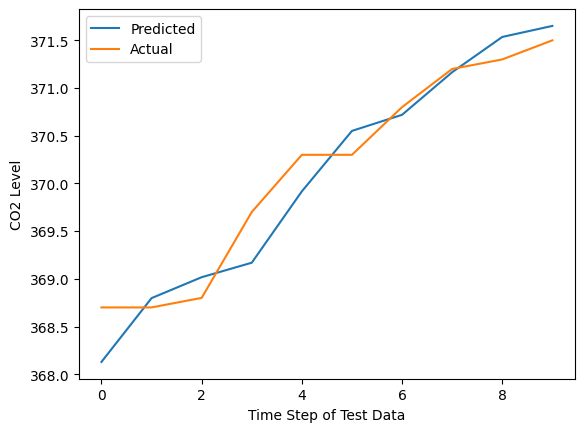

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = data[['co2']].values


X_train, X_test = data_array[:-10], data_array[-10:]
X_test_orig = X_test



fcst = []
for step in range(10):

    mod = ARIMA(X_train, order=(4,1,4))
    res = mod.fit()
    fcst.append(res.forecast(steps=1))
    X_train = np.concatenate((X_train, X_test[0:1,:]))
    X_test = X_test[1:]

plt.plot(fcst)
plt.plot(X_test_orig)
plt.legend(['Predicted', 'Actual'])
plt.ylabel('CO2 Level')
plt.xlabel('Time Step of Test Data')
plt.show()


0.9971464894365117


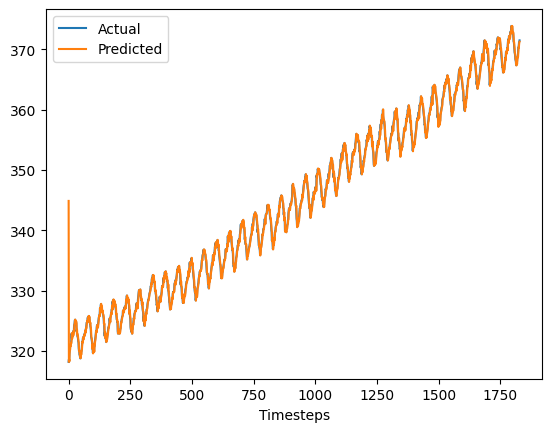

In [ ]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Remove the first entries from the dataset
data = data.iloc[1:]

# Forecast the first ARMA(1,1) model
mod = ARIMA(list(data['co2']), order=(1, 0, 1))
res = mod.fit()
pred = res.predict()
print(r2_score(data, pred))

plt.plot(list(data['co2']))
plt.plot(pred)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Timesteps')
plt.show()


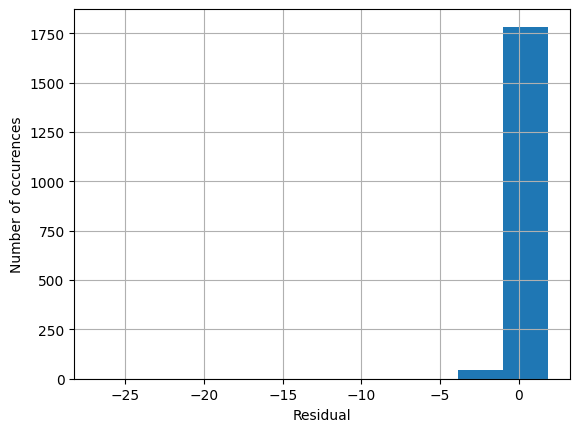

In [ ]:
ax = pd.Series(res.resid).hist()
ax.set_ylabel('Number of occurences')
ax.set_xlabel('Residual')
plt.show()

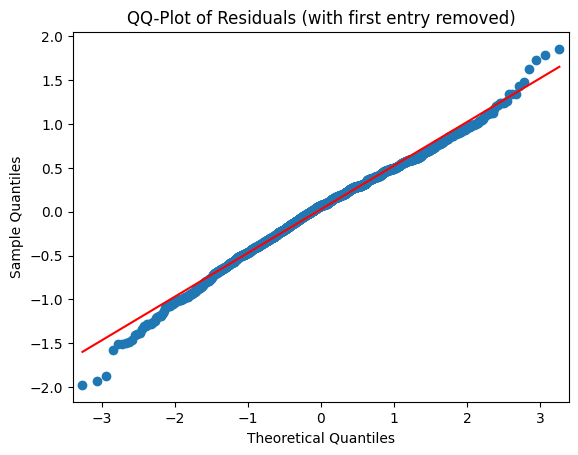

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have the residuals stored in a variable called 'residuals'
# Replace this with your actual residuals data
residuals = res.resid

# Remove the first entry (outlier)
residuals = residuals[1:]

# Create a QQ-Plot
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot of Residuals (with first entry removed)')
plt.show()
